# Week 6 — Statistics & Hypothesis Testing

**Goals**
- Understand probability distributions
- Perform hypothesis tests (t-test, chi-square)
- Simulate A/B tests and compute confidence intervals

## 0) Setup

In [1]:
# !pip -q install pandas numpy scipy statsmodels seaborn matplotlib
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import scipy.stats as stats
import scipy
import statsmodels.api as sm
print(scipy.__version__)  

1.16.2


## 1) Distributions & sampling

In [2]:
np.random.seed(42)
sample = np.random.normal(loc=50, scale=10, size=500)
pd.Series(sample).describe()

count    500.000000
mean      50.068380
std        9.812532
min       17.587327
25%       42.996926
50%       50.127971
75%       56.367833
max       88.527315
dtype: float64

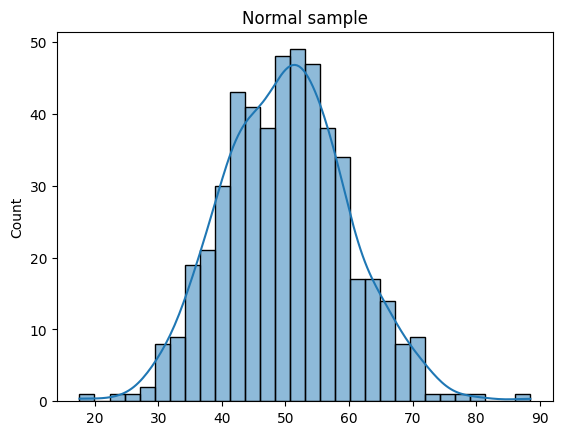

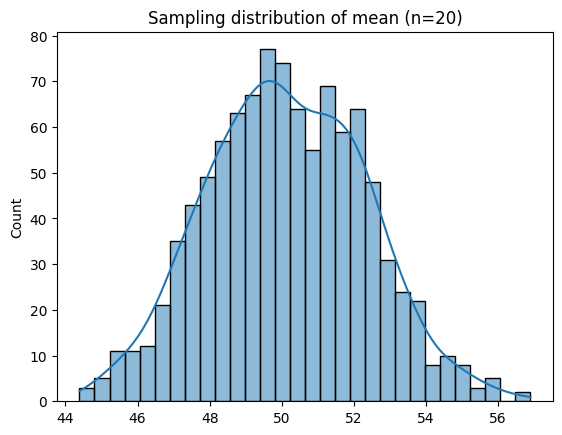

In [3]:
plt.figure()
sns.histplot(sample, bins=30, kde=True); plt.title('Normal sample'); plt.show()

means = [np.mean(np.random.choice(sample, size=20)) for _ in range(1000)]
plt.figure()
sns.histplot(means, bins=30, kde=True); plt.title('Sampling distribution of mean (n=20)'); plt.show()

## 2) t-tests & chi-square

In [4]:
control = np.random.binomial(1, 0.10, size=500)
variant = np.random.binomial(1, 0.12, size=500)

count = np.array([control.sum(), variant.sum()])
nobs = np.array([len(control), len(variant)])
z_stat, p_value = sm.stats.proportions_ztest(count, nobs)
z_stat, p_value

(np.float64(-1.278998601612563), np.float64(0.20089754832736828))

In [5]:
t1 = np.random.normal(60, 8, size=200)
t2 = np.random.normal(63, 8, size=200)
stats.ttest_ind(t1, t2, equal_var=False)

TtestResult(statistic=np.float64(-4.020182469873257), pvalue=np.float64(6.963790260276096e-05), df=np.float64(395.7785770691916))

## 3) Confidence intervals (bootstrap)

In [6]:
def bootstrap_mean_ci(x, n_boot=2000, alpha=0.05):
    boots = np.random.choice(x, (n_boot, len(x)), replace=True).mean(axis=1)
    lower, upper = np.percentile(boots, [100*alpha/2, 100*(1-alpha/2)])
    return lower, upper

ci = bootstrap_mean_ci(t2 - t1)
ci

(np.float64(1.6369354748402516), np.float64(4.758248524300326))

## 4) Mini-project tasks

- Power analysis: estimate sample sizes for a target lift and alpha.
- Chi-square test of independence on a contingency table.
- Simulate A/B/C test and choose winner with adjusted p-values.